In [3]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
from numpy.linalg import inv
from numpy.linalg import qr
from numpy.linalg import pinv
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats

<a id="0"></a> <br>
 # Table of Contents  
1. [Introduction](#1)     
1. [Simple linear regression](#2) 
    1. [Ordinary Least Squares](#3)
    1. [Linear Regression with statsmodel ](#4)
1. [QR Decomposition](#5) 
1. [Least squares via Singular Value Decomposition with pseudouniverse](#6) 
1. [Gradient Descent in Linear Regression](#7)     
    1. [Gradient Descent Algorithm](#8)
1. [Assumptions of Linear Regression](#9)
1. [Multiple linear regressionn](#10) 
    1. [Assesing the model](#11)     
1. [Assumptions of Multiple Linear Regression](#12)     
    1. [Multicollinearity](#13)     
    1. [Overfitting and Underfitting](#14)     
    1. [Lasso Regularization – L1 Regularization](#15)
    1. [Ridge Regularization – L2 Regularization](#16)
    1. [Elastic Net Regularization – L1 and L2 Regularization](#17)
1. [Linear Regression Model Performance](#18)       
    1. [Evaluating linear regression models](#19)      
1. [Generalized Linear Model](#20)     
    1. [Components of GLM](#21)         
    1. [Logistic regression](#22)             
    1. [Poisson regression](#23)


# Linear regression

<a id="1"></a> 
## Introduction
Linear regression is a type of statistical analysis used to predict the relationship between two variables. It assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship. The line is determined by minimizing the sum of the squared differences between the predicted values and the actual values. 
Linear regression models have many real-world applications in an array of industries such as economics (e.g. predicting growth), business (e.g. predicting product sales, employee performance), social science (e.g. predicting political leanings from gender or race), healthcare (e.g. predicting blood pressure levels from weight, disease onset from biological factors), and more. It can also be extended to multiple linear regression, where there are multiple independent variables, and logistic regression, which is used for binary classification problems.


<a id="2"></a> 
## Simple linear regression
In a simple linear regression, there is one input independent variable (X) one dependent variable(Y). The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables. The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero.

The formula for simple linear regression model is as follows:

$$ Y = \beta_0  + \beta_1 * X + \epsilon$$

where:

* **Y** represents the dependent variable (the variable we want to predict or explain).

* **X** represents the independent variable (the variable used to predict or explain Y).

* **β₀** is the y-intercept (the value of Y when X is 0).

* **β₁** is the slope (the change in Y for a unit change in X).

* **ε** is the error term (the difference between the predicted Y value and the actual Y value).

Linear regression is a  statistical regression method used for predictive analysis in machine learning. Linear regression shows the linear relationship between the independent(predictor) variable i.e. X-axis and the dependent(output) variable i.e. Y-axis, called linear regression. If there is a single input variable X(independent variable), such linear regression is called simple linear regression.

<img src = 'image1.jpg' style = 'max-height: 400px'>

The above graph presents the linear relationship between the output(y) variable and predictor(X) variables.  The blue line is referred to as the best fit straight line. Based on the given data points, we attempt to plot a line that fits the points the best.

To calculate best-fit line we use $$ y = \beta_0  + \beta_1 * X $$


<img src = 'Linear regression.jpg' style='max-height: 400px'>

However, how the linear regression finds out which is the best fit line?

The goal of the linear regression algorithm is to get the best values for **β₀** and **β₁** to find the best fit line. The best fit line is a line that has the least error which means the error between predicted values and actual values should be minimum. Error is the distance between the point to the regression line. Slope (**β₁**) tells, for one unit of increase in x, how many units does it increase in y. When the line is steep, the slope will be higher, the slope will be lower for the less steep line.
Constant (**β₀**) means, what is the value of y when the x is zero.

In order to minimize the error we could use a method called ordinary least squares.


<a id="3"></a> 
### Ordinary Least Squares 
The objective of the least squares method is to find values of intercept (**β₀**) and slope (**β₁**) that minimise the sum of the squared difference.
We could find the values of the unknown parameters using the formulas below:

$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i-\overline{x} )(y_i-\overline{y})}{\sum_{i=1}^{n}(x_i-\overline{x})^2}$$
$$\beta_0 = \overline{y} - \beta_1 * \overline{x} $$


Exploring (**β₁**):
* If **β₁** > 0, then x(predictor) and y(target) have a positive relationship. That is increase in x will increase y.
* If **β₁** < 0, then x(predictor) and y(target) have a negative relationship. That is increase in x will decrease y. 

Exploring (**β₀**)

* If the model does not include x=0, then the prediction will become meaningless with only **β₀**. For example, we have a dataset that relates height(x) and weight(y). Taking x=0(that is height as 0), will make equation have only **β₀** value which is completely meaningless as in real-time height and weight can never be zero. This resulted due to considering the model values beyond its scope.
* If the model includes value 0, then **β₀** will be the average of all predicted values when x=0. But, setting zero for all the predictor variables is often impossible.
* The value of **β₀** guarantee that residual have mean zero. If there is no **β₀** term, then regression will be forced to pass over the origin. Both the regression co-efficient and prediction will be biased.


<a id="4"></a> 
### Linear Regression with statsmodels
Now we will discuss how to use the ols method from the statsmodels library.

To demonstrate this method, I will usea very popular advertising dataset about various costs incurred on advertising by different mediums and the sales for a particular product.

I will only be looking at the TV variable in this example — I will explore whether TV advertising spending can predict the number of sales for the product. 

In [3]:
#Importing the data
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


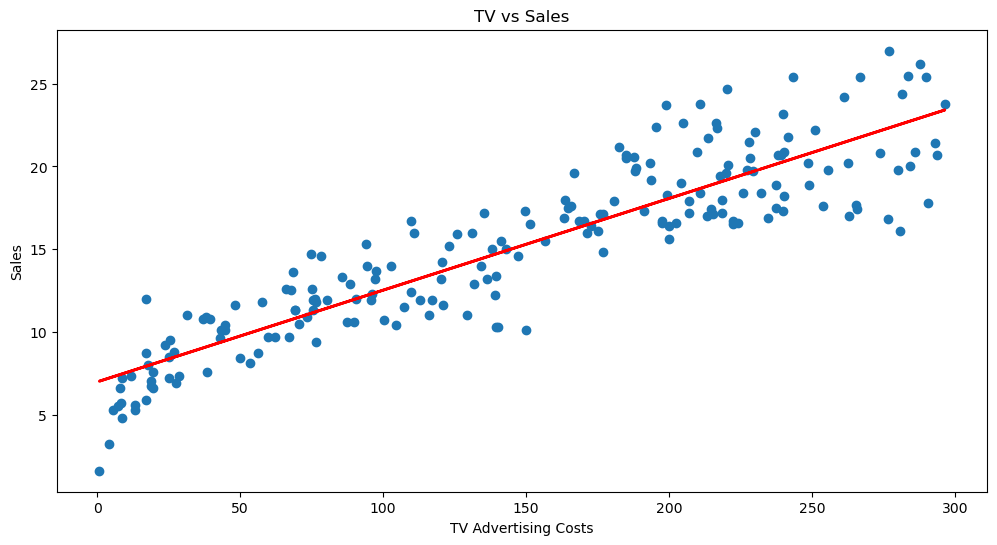

In [14]:
# Initialise and fit linear regression model using `statsmodels` which takes the formula y ~ X
# where X is the predictor variable (TV advertising costs) and y is the output variable (Sales)
model = smf.ols('Sales ~ TV', data=data)
model = model.fit()
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['TV'], data['Sales'], 'o')           # scatter plot showing actual data
plt.plot(data['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

We can see that there is a positive linear relationship between TV advertising costs and Sales — in other words, spending more on TV advertising predicts a higher number of sales!

With this model, we can predict sales from any amount spent on TV advertising. For example, if we increase TV advertising costs to $1000, we can predict that sales will increase to 62 units:

In [17]:
new_X = 1000
model.predict({"TV": new_X})

0    62.439592
dtype: float64

<a id="5"></a> 
### QR Decomposition
In linear regression, the QR decomposition is a method used to solve the normal equations and find the least squares solution for an overdetermined system of linear equations. The QR decomposition factors the coefficient matrix of the linear system into the product of an orthogonal matrix $Q$ and an upper triangular matrix $R$. The advantage of using QR decomposition in linear regression is that it provides a numerically stable and efficient method for solving the normal equations. Additionally, the orthogonal matrix $Q$ can be used for various purposes, such as orthonormalizing the input variables or performing dimensionality reduction.
For a square matrix $A$ the QR decomposition converts  $A$ into the product the orthogonal matrix $Q$ ($Q^TQ=I$) an upper triangular matrix $R$.

There are a few different algorithms for calculating the matrices $Q$ and $R$. We will outline the method of Householder Reflections, which is known to be more numerically stable the the alternative Gramm-Schmidt method.

A Householder Reflection is a linear transformation that enables a vector to be reflected through a plane or hyperplane. Essentially, we use this method because we want to create an upper triangular matrix, $R$. The householder reflection is able to carry out this vector reflection such that all but one of the coordinates disappears. The matrix $Q$ will be built up as a sequence of matrix multiplications that eliminate each coordinate in turn, up to the rank of the matrix $A$.

The first step is to create the vector $x$ which is the $k-th$ column of the matrix $A$ for step $k$. We define $\alpha = -sgn(x_k)(||x||)$. The norm ||.|| used here is the Euclidean norm.Given the first column vector of the identity matrix $I$ of equal size to $A, e1 = (1,0,...,0)^T$ we create the vector $u$.
$$u = x + \alpha e_1$$
Once we have the vector $u$, we need to convert it to a unit vector, which we denote as $v$.
$$v=u/||u||$$
Now we form the matrix $Q$ out of the identity matrix $I$ and the vector multiplication of $v$:
$$Q = I-2vv^T$$
$Q$ now is an $m × m$ Householder matrix, with $Q_x = (\alpha,0,...,0)^T$. We will use $Q$ to transform $A$ to to upper triangular form, giving us the matrix $R$. We denote $Q$ as $Q_k$ and since $k=1$ in this first step, we have $Q_1$ as our first Householder matrix. We multiply this with $A$ to give us: $$Q_1A=\begin{bmatrix}{\alpha}1 & \begin{matrix} * & ... & *  \end{matrix} \\\begin{matrix} 0 \\ : \\ 0  \end{matrix} &A'\end{bmatrix}$$
The whole process is now repeated for the minor matrix $A'$ which will give a second Householder matrix $Q'_2$. Now we have to "pad out" this minor matrix with elements from the identity matrix such that we can consistently multiply the Householder matrices together. Hence, we define $Q_k$ as the block matrix:
$$Q_k=\begin{pmatrix}I_{k-1} & 0 \\0 & Q'_k \end{pmatrix}$$
Once we have carried out $t$ iterations of this process we have $R$ as an upper triangular matrix:
$$R=Q_t...Q_2Q_1A$$
$Q$ is then fully defined as the multiplication of the transposes of each $Q_k$:
$$Q=Q_1^TQ_2^T...Q_t^T$$
This gives $A=QR$, the QR decomposition of $A$. 

To calculate the QR Decomposition of a matrix $A$ with NumPy/SciPy, we can make use of the built-in linalg library via the linalg.qr function. This is significantly more efficient than using a pure Python implementation:

[1.00233226]


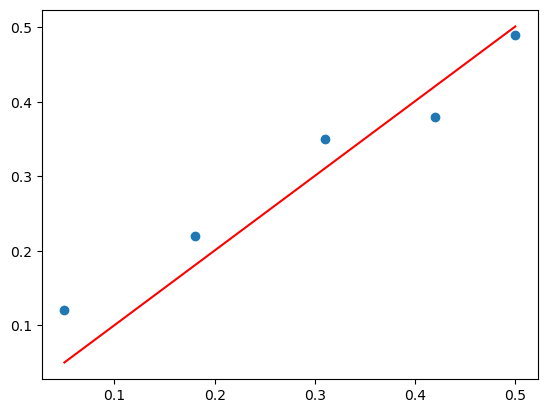

In [4]:
data = np.array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49],
])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# QR decomposition
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

<a id="6"></a> 
### Least squares via Singular Value Decomposition with pseudouniverse
A matrix has an inverse whenever it is square and its rows are linearly independent. But not every system of equations  will give us a matrix that satisfies these properties. The coefficient matrix $A$ would fail to be invertible if the system did not have the same number of equations as unknowns ($A$ is not square), or if the system had dependent equations ($A$ has dependent rows).

Generalized inverses are meant to solve this problem. They are meant to solve equations like $Ax=b$ in the “best way possible” when $A^{-1}$fails to exist. There are many kinds of generalized inverses, each with its own “best way.” 

The most common is the Moore-Penrose inverse, or sometimes just the pseudoinverse. It solves the least-squares problem for linear systems, and therefore will give us a solution $\hat{x}$ so that $A\hat{x}$ is as close as possible in ordinary Euclidean distance to the vector b.

The notation for the Moore-Penrose inverse is $A^{+}$instead of $A^{−1}$. If $A$ is invertible, then in fact $A^+=A^{-1}$, and in that case the solution to the least-squares problem is the same as the ordinary solution $(A^{+}b=A^{−1}b)$. So, the MP-inverse is strictly more general than the ordinary inverse: we can always use it and it will always give us the same solution as the ordinary inverse whenever the ordinary inverse exists.

We will look at how we can construct the Moore-Penrose inverse using the SVD. This turns out to be an easy extension to constructing the ordinary matrix inverse with the SVD. We will then see how solving a least-squares problem is just as easy as solving an ordinary equation.

The singular value decomposition (SVD) gives us an intuitive way constructing an inverse matrix. We will be able to see how the geometric transforms of $A^{−1}$ undo the transforms of ${A}$.
The SVD says that for any matrix $A$, $$A=UΣV^{∗}$$ where $U$ and $V$  are orthogonal matricies and $Σ$ is a diagonal matrix.

Now, if $A$ is invertible, we can use its SVD to find $A^{−1}$ like so: $$A^{−1}=VΣ^{−1}U^{∗}$$

If we have the SVD of $A$, we can construct its inverse by swapping the orthogonal matrices $U$ and $V$ and finding the inverse of $Σ$. Since $Σ$is diagonal, we can do this by just taking reciprocals of its diagonal entries.

[1.00233226]


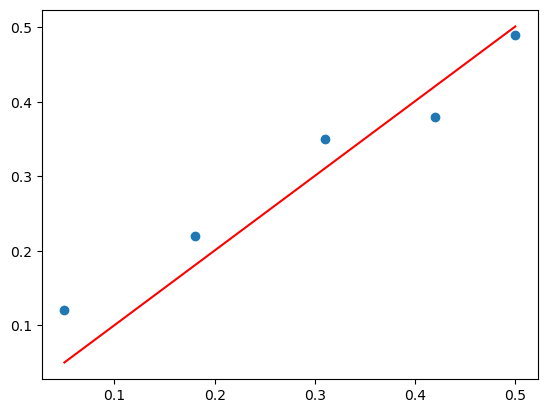

In [7]:
data = np.array([
 [0.05, 0.12],
 [0.18, 0.22],
 [0.31, 0.35],
 [0.42, 0.38],
 [0.5, 0.49],
 ])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

<a id="7"></a> 
## Gradient Descent in Linear Regression
Gradient descent algorithm is an optimisation algorithm that uses to find the optimal value of parameters that minimises loss function. For instance, the algorithm iteratively adjusts the parameters such as weights and biases of the neural network to find the optimal parameters that minimise the loss function. Before jumping into the algorithm, we need to explain the partial derivatives and gradient.
* A partial derivative of a function of multi variables is its derivative with respect to one of those variables, with the others held constant. It gives the rate of change of a function in the direction of a variable. It can determine how changes in the direction of a variable influence the function.
* In a higher-dimensional function, the gradient is a vector made up of all the partial derivatives of the function.
The gradient of the function f(x,y) is represented as below:
$$ \nabla F = \begin{bmatrix} \frac{\partial_{f}} {\partial_{x}} \\ \frac{\partial_{f}} {\partial_{y}} \\ \end{bmatrix}$$

Derivative of a function is the slope of the tangent line that gives a rate of change in a given point. If the function is higher-dimensional we have to find the partial derivatives to find the rate of change of the function at a given point. In higher dimension, a gradient is a vector that contains partial derivatives to determine the rate of change. We can consider gradient as the slope in a higher dimensional function. In a lower-dimensional function, the gradient is a slope of the tangent line that determines the rate of change at a given point.

Slope measurse both the direction and the steepness of the line.

The gradient gives the direction of the maximum change and the magnitude indicates the maximum rate of change. The gradient always points in the direction of the steepest increase in the objective function.

<img src = 'gradient2.png' style='max-height: 400px'>

If we update variables or parameters of some cost function in the direction of the negative gradient in an iterative manner to reach the minimum of some cost function is called gradient descent algorithm.

In Linear Regression Gradient descent is a tool to arrive at the line of best fit. Using gradient descent, you start with a random line. Then you change the parameters of the line (i.e. slope and y-intercept) little by little to arrive at the line of best fit. For every line you try — line A, line B, line C, etc — you calculate the sum of squares of the errors. If line B has a smaller value than line A, then line B is a better fit.
Line of best fit is the least square regression line.

Gradient descent is an algorithm that approaches the least squared regression line via minimizing sum of squared errors through multiple iterations.
You start with a random line, let’s say line A. You compute the sum of squared errors for that line. Then, you adjust your slope and y-intercept. You compute the sum of squared errors again for your new line. You continue adjusting until you reach a local minimum, where the sum of squared errors is the smallest and additional tweaks does not produce better result. 


<a id="8"></a> 
### Gradient Descent Algorithm
In machine learning terminology, the sum of squared error is called the “cost”. This cost equation is:
$$cost = \frac{1}{2m} \sum_{i=1}^{m}((h(x_i)-y_i)^2$$

This equation is therefore roughly “sum of squared errors” as it computes the sum of predicted value minus actual value squared.

The 1/2m is to “average” the squared error over the number of data points so that the number of data points doesn’t affect the function. 

In gradient descent, the goal is to minimize the cost function. We do this by trying different values of slope and intercept. But which values to try and how do you go about changing those values?

We change their values according to the gradient descent formula, which comes from taking the partial derivative of the cost function.

By taking the partial derivative, you arrive at the formula:
$$new_{intercept} = old_{intercept} - \alpha*\frac{1}{m}\sum((h(x_i) - y_i)$$

$$new_{slope} = old_{slope} - \alpha*\frac{1}{m}\sum((h(x_i) - y_i) * x_i $$

In machine learning, we use theta to represent the vector [y-intercept, slope]. Theta0 = y-intercept. Theta1=slope.This formula computes by how much you change your theta with each iteration.

The alpha (α) is called the learning rate. The learning rate determines how big the step would be on each iteration. It’s critical to have a good learning rate because if it’s too large your algorithm will not arrive at the minimum, and if it’s too small, your algorithm will take forever to get there. For my example, I picked the alpha to be 0.000003

To summarize, the steps are:

* Estimate θ
* Compute cost
* Tweak θ
* Repeat 2 and 3 until you reach convergence.

<img src = 'gradient.png' style='max-height: 400px'>

Below is the implementation for simple linear regression using gradient descent.




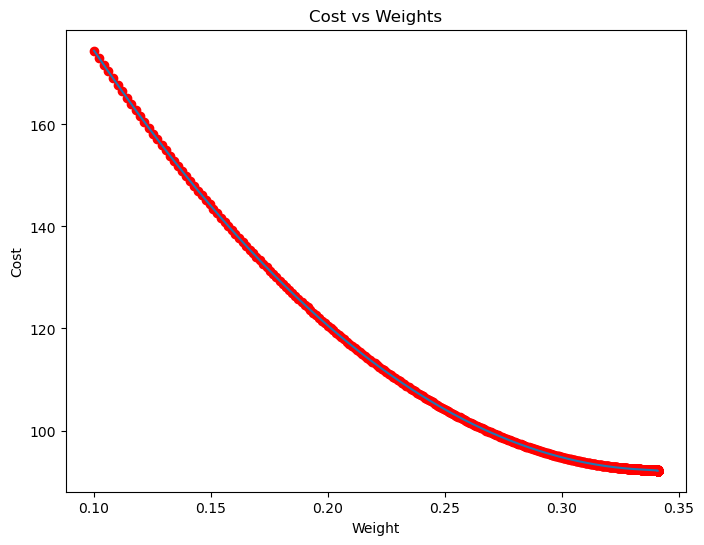

Estimated Weight: 0.34087287174254693
Estimated Bias: 0.0433028844648181


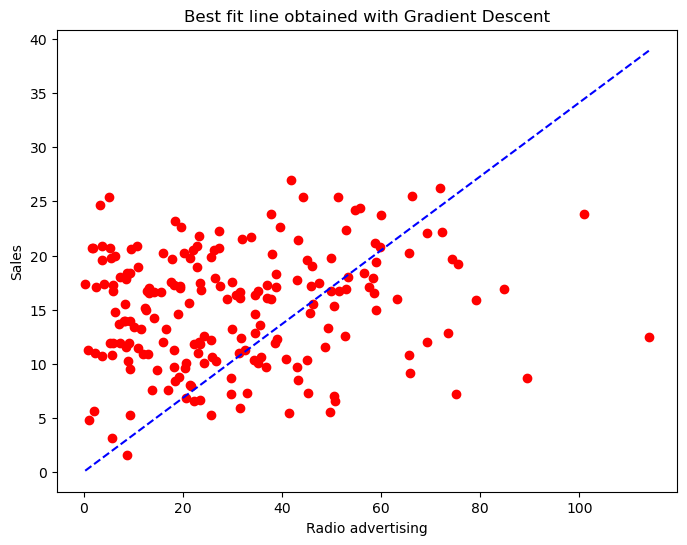

In [94]:
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 2000, learning_rate = 0.000003,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
 
def main():
     
    # Data
    X = np.array(data['Newspaper'])
    Y = np.array(data['Sales'])
 
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=1000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias
 
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.title("Best fit line obtained with Gradient Descent")
    plt.xlabel("Radio advertising")
    plt.ylabel("Sales")
    plt.show()
 
     
if __name__=="__main__":
    main()
 

Overall, Gradient Descent is a useful optimization algorithm for linear regression, but it has some limitations and requires careful tuning of the learning rate to ensure convergence.
Advantages:

* Flexibility: Gradient Descent can be used with various cost functions and can handle non-linear regression problems.
* Scalability: Gradient Descent is scalable to large datasets since it updates the parameters for each training example one at a time.
* Convergence: Gradient Descent can converge to the global minimum of the cost function, provided that the learning rate is set appropriately.

Disadvantages:
* Sensitivity to Learning Rate: The choice of learning rate can be critical in Gradient Descent since using a high learning rate can cause the algorithm to overshoot the minimum, while a low learning rate can make the algorithm converge slowly.
* Slow Convergence: Gradient Descent may require more iterations to converge to the minimum since it updates the parameters for each training example one at a time.
* Local Minima: Gradient Descent can get stuck in local minima if the cost function has multiple local minima.
* Noisy updates: The updates in Gradient Descent are noisy and have a high variance, which can make the optimization process less stable and lead to oscillations around the minimum.

<a id="9"></a> 
## Assumptions of Linear Regression
Regression is a parametric approach, which means that it makes assumptions about the data for the purpose of analysis. For successful regression analysis, it’s essential to validate the following assumptions.
* Linearity of residuals: There needs to be a linear relationship between the dependent variable and independent variable(s).
<img src = 'image3.png' style = 'max-height: 5000px'>
* Independence of residuals: The error terms should not be dependent on one another. There should be no correlation between the residual terms.
*  Normal distribution of residuals: The mean of residuals should follow a normal distribution with a mean equal to zero or close to zero. This is done in order to check whether the selected line is actually the line of best fit or not. If the error terms are non-normally distributed, suggests that there are a few unusual data points that must be studied closely to make a better model.

<img src = 'image2.png' style = 'max-height: 1000px'>
* The equal variance of residuals: The error terms must have constant variance. This  is known as Homoscedasticity. The presence of non-constant variance in the error terms is referred to as Heteroscedasticity.

<img src = 'image4.jpg' style = 'max-height: 400px'>

<a id="10"></a> 
## Multiple linear regression
Multiple linear regression is a technique to understand the relationship between a single dependent variable and multiple independent variables.
The formulation for multiple linear regression is also similar to simple linear regression with
the small change that instead of having one beta variable, you will now have betas for all the variables used. The formula is given as:
$$ Y = \beta_0  + \beta_1 * X_1 + \beta_2 * X_2 +...+ \beta_n * X_n + \epsilon$$

Using the example above , we will be predicting Sales using the variables TV and Radio i.e. our model can be written as:
$$Sales = \beta_0 + \beta_1 * TV + \beta_2 * Radio $$

In [31]:
predictors = ['TV', 'Radio']
X_MLR = data[predictors]
y_MLR = data['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X_MLR, y_MLR)

print(f'betazero = {model.intercept_}')
print(f'betas = {model.coef_}')


betazero = 4.63087946409777
betas = [0.05444896 0.10717457]


Therefore our model could be written as:
$$ Sales = 4.6309 + 0.054 * TV + 0.107 * Radio $$ 

If we want to know how many sales we would make if we invested 400 dollars in TV advertising and 300 dollars in Radio advertising we have to plug in the values!


In [27]:
new_X_pred = [[400, 300]]
print(model.predict(new_X_pred))

[58.56283516]


C:\Users\nadya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a id="11"></a> 
#### Assesing the model
* t statistic: It is used to determine the p-value and hence, helps in determining whether the coefficient is significant or not
* F statistic: It is used to assess whether the overall model fit is significant or not. Generally, the higher the value of the F-statistic, the more significant a model turns out to be.
* R-squared value: This value ranges from 0 to 1. Value 1 indicates predictor perfectly accounts for all the variation in Y. Value 0 indicates that predictor x accounts for no variation in y.

Considering the summary of the linear regression above, here are some key statistics from the summary:
* The coefficient for TV is 0.054, with a very low p-value. The coefficient is statistically significant. So the association is not purely by chance.
* R – squared is 0.822 Meaning that 82.2% of the variance in `Sales` is explained by `TV`. This is a decent R-squared value.
* F-statistics has a very low p-value(practically low). Meaning that the model fit is statistically significant, and the explained variance isn’t purely by chance

<a id="12"></a> 
### Assumptions of Multiple Linear Regression
All the four assumptions made for Simple Linear Regression are true for Multiple Linear Regression along with a few new additional assumptions.
* Overfitting: When more and more variables are added to a model, the model may become too complex and usually ends up memorizing all the data points in the training set. This is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.
* Multicollinearity: It happens when a model with several independent variables, may have some variables interrelated.
* Feature Selection: With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model.

<a id="13"></a> 
#### Multicollinearity
Every regression analysis has a goal to find and isolate the relationship between each independent variable and the dependent variable. Relationships expressed in regression coefficient. When we interpret the regression coefficient, we know that it represents the mean change in the dependent variable for each one-unit change in an independent variable when we hold all of the other independent variables constant. In other words, one independent variable can be linearly predicted from one or multiple other independent variables. But here we face a phenomenon when one independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. And it brings us problems with the explanation of the model and trustworthy results.

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model and could be due to:
* Multicollinearity could exist because of the problems in the dataset at the time of creation. These problems could be because of poorly designed experiments, highly observational data, or the inability to manipulate the data.
* Multicollinearity could also occur when new variables are created which are dependent on other variables.
* Including identical variables in the dataset.
* Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap.
* Insufficient data, in some cases, can also cause multicollinearity problems.

There are two simple ways to indicate multicollinearity in the dataset on EDA or obtain steps using Python:

1. Heat map or correlation matrix-a correlation matrix with a color gradient background. This scale will be from 0–1 with 1 being perfectly correlated:
* between 0.9 and 1.0 indicates very highly correlated variables;
* between 0.7 and 0.9 indicate variables that can be considered highly correlated;
* between 0.5 and 0.7 indicate variables that can be considered moderately correlated;
* between 0.3 and 0.5 mean low correlation.
2. Variance Inflation Factor (VIF): is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the ratio of the variance of all a given model’s betas to divide by the variance of a single beta if it were fit alone.

$$VIF = \frac{1}{1-R^2} $$

If VIF > 10 then the value is definitely high and it should be dropped. And if the VIF=5 then it may be valid but should be inspected first. If VIF < 5, then it is considered a good vif value.

In [6]:
MC = data[['TV', 'Radio', 'Newspaper']]
vif_df = pd.DataFrame() 
vif_df["feature"] = MC.columns 
  
# calculating VIF for each feature 
vif_df["VIF"] = [variance_inflation_factor(MC.values, i) 
                          for i in range(len(MC.columns))]
# displaying the VIF table
vif_df

,feature,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


When we want to avoid highly correlated variables in our prediction we can use one of the solution:

* Feature Engineering
* Drop One

Feature Engineering is aggregate or combine the two highly correlated features and turn them into one variable.

Drop one only sounds easy but needs a proper EDA before you decide which variable you should remove.

<a id="14"></a> 
#### Overfitting and Underfitting
There have always been situations where a model performs well on training data but not on the test data. While training models on a dataset, overfitting, and underfitting are the most common problems faced by people.
* Bias - a measure to determine how accurate is the model likely to be on future unseen data. Complex models,  assuming there is enough training data available, can do predictions accurately. Whereas the models that are too naive, are very likely to perform badly with respect to predictions.
* Variance - the sensitivity of the model towards training data, that is it quantifies how much the model will react when input data is changed.

If the algorithm is too simple (hypothesis with linear eq.) then it may be on high bias and low variance condition and thus is error-prone. If algorithms fit too complex ( hypothesis with high degree eq.) then it may be on high variance and low bias. In the latter condition, the new entries will not perform well. Well, there is something between both of these conditions, known as Trade-off or Bias Variance Trade-off.

This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time. 


There is an inverse relationship between bias and variance:

<img src = 'image5.png' style = 'max-height: 600px'>

* An increase in bias will decrease the variance.
* An increase in the variance will decrease the bias.

##### Overfitting

When a model has low bias and higher variance it ends up memorizing the data and causing overfitting. Overfitting causes the model to become specific rather than generic. This usually leads to high training accuracy and very low test accuracy.

Detecting overfitting is useful, but it doesn’t solve the actual problem. There are several ways to prevent overfitting, which are stated below:

* Cross-validation
* If the training data is too small to train add more relevant and clean data.
* If the training data is too large, do some feature selection and remove unnecessary features.
* Regularization

##### Underfitting
When the model fails to learn from the training dataset and is also not able to generalize the test dataset, is referred to as underfitting. This type of problem can be very easily detected by the performance metrics.

When a model has high bias and low variance it ends up not generalizing the data and causing underfitting. It is unable to find the hidden underlying patterns from the data. This usually leads to low training accuracy and very low test accuracy. The ways to prevent underfitting are stated below,

* Increase the model complexity
* Increase the number of features in the training data
* Remove noise from the data.

Regularization is a technique used to reduce errors by fitting the function appropriately on the given training set and avoiding overfitting. The commonly used regularization techniques are : 

* Lasso Regularization – L1 Regularization
* Ridge Regularization – L2 Regularization
* Elastic Net Regularization – L1 and L2 Regularization

<a id="15"></a> 
#### Lasso Regularization – L1 Regularization
L1 regularization is a method of doing regularization. It tends to be more specific than gradient descent, but it is still a gradient descent optimization problem. Formula and high level meaning over here:
$$Cost = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2+\lambda \sum_{i=1}^m |w_i|$$
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “Absolute value of magnitude” of coefficient, as penalty term to the loss function.

Lasso shrinks the less important feature’s coefficient to zero; thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

The L1 regularizer basically looks for the parameter vectors that minimize the norm of the parameter vector (the length of the vector). This is essentially the problem of how to optimize the parameters of a single neuron, a single layer neural network in general, and a single layer feed-forward neural network in particular.

Key points about L1 Regularizatio:
* L1 regularization is that it is easy to implement and can be trained as a one-shot thing, meaning that once it is trained you are done with it and can just use the parameter vector and weights.
* L1 regularization is robust in dealing with outliers. It creates sparsity in the solution (most of the coefficients of the solution are zero), which means the less important features or noise terms will be zero. It makes L1 regularization robust to outliers.

<a id="16"></a> 
#### Ridge Regularization – L2 Regularization
A regression model that uses the L2 regularization technique is called Ridge regression. Regularization adds the penalty as model complexity increases. The regularization parameter ($\lambda$) penalizes all the parameters except intercept so that the model generalizes the data and won’t overfit. Ridge regression adds “squared magnitude of the coefficient” as penalty term to the loss function. Here the box part in the above image represents the L2 regularization element/term.

$$Cost = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2+\lambda \sum_{i=1}^m w_i^2$$

Lambda is a hyperparameter.

If lambda is zero, then it is equivalent to OLS.
But if lambda is very large, then it will add too much weight, and it will lead to under-fitting. Important points to be considered about L2 can be listed below:

* Ridge regularization forces the weights to be small but does not make them zero and does not give the sparse solution.
* Ridge is not robust to outliers as square terms blow up the error differences of the outliers, and the regularization term tries to fix it by penalizing the weights.
* Ridge regression performs better when all the input features influence the output, and all with weights are of roughly equal size.
* L2 regularization can learn complex data patterns

<a id="17"></a> 
#### Elastic Net Regularization – L1 and L2 Regularization
This model is a combination of L1 as well as L2 regularization. That implies that we add the absolute norm of the weights as well as the squared measure of the weights. With the help of an extra hyperparameter that controls the ratio of the L1 and L2 regularization.
$$Cost = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2+\lambda((1-\alpha)|w_i|+\alpha\sum_{i=1}^m w_i^2)$$


<center><img src="regular.png" width="500" height="500"/>

<a id="18"></a> 
## Linear Regression Model Performance

We will use a score dataset to build a simple linear regression model to predict the Scores(dependent/target variable) based on the number of Hours(independent variable) a student takes to study.

In [37]:
# importing the dataset which would be used, the dataset has two columns Hours and Scores
scores = pd.read_csv('score.csv')
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We are checking whether both columns are numeric variables with the function info().

In [41]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Next, we are checking whether the data has any missing values.

In [39]:
scores.isna().sum()

Hours     0
Scores    0
dtype: int64

In [44]:
# check for correlation
scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Checking for correlation helps us understand the relationship between the variables. There is a strong positive correlation between Hours and Scores. Below is a heatmap of the correlation

<AxesSubplot:>

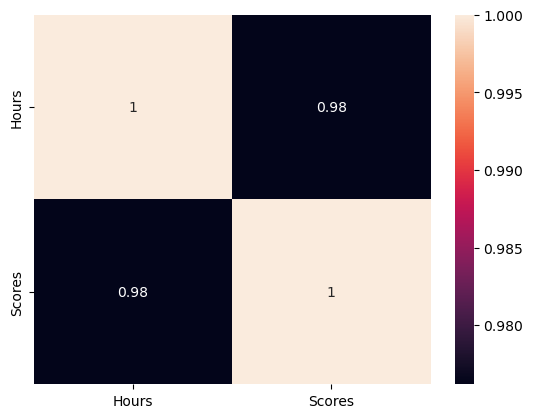

In [45]:
sns.heatmap(scores.corr(), annot=True)

We can also plot a scatter plot to determine whether linear regression is the ideal method for predicting the Scores based on the Hours of study. We could see that the linear regression is suitable model for the prediction because there is a linearly increasing relationship between the dependant and independant variables.

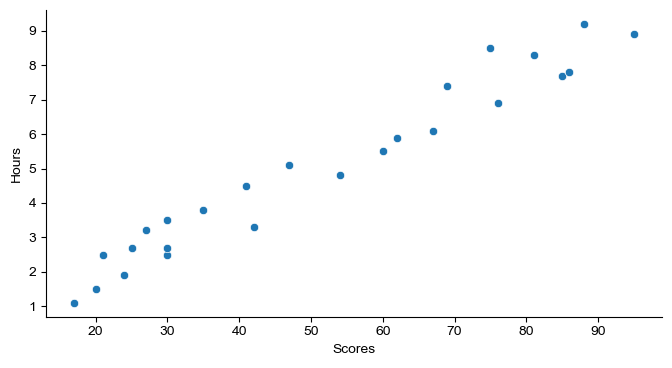

In [46]:
sns.relplot(x='Scores', y='Hours', data=scores, 
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

We shall split our datasets into train and test subsets. We would use ration 70:30.

In [48]:
X = scores.iloc[:,:-1].values # feature matrix
y = scores.iloc[:,1].values # response vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


Next, our task is to train the model. Instantiate an object of the class named regressor. The regressor object is also called an estimator. An estimator is any object that fits a model based on some training data and is capable of inferring some properties on new data. The fit method takes the training data as the argument. We use this method to estimate some parameters of a model. For instance, we have passed in the X_train and the y_train – the independent and dependent variables. The model learns the correlations between the predictor and target variables.

In [49]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

We could now check the coefficient and the intercept of our model.

In [53]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Slope: [10.41075981]
Intercept: -1.5123061161277889


The coefficient shows that, on average, the score increased by approximately  10.41 points for every hour the student studied.

The Seaborn 'regplot' function enables us to visualize the linear fit of the model. It will draw a scatter plot of the variables and then fit the linear regression model. The regression line will be plotted with a 95% confidence interval.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

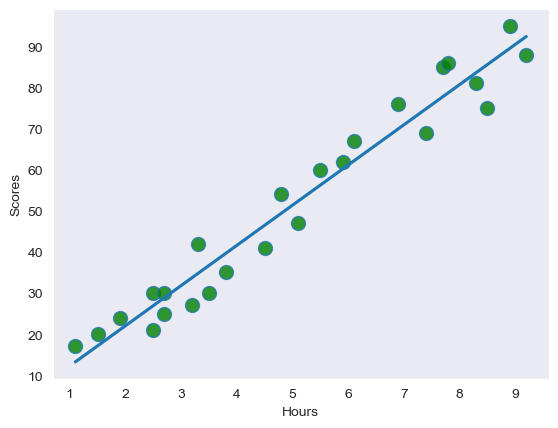

In [55]:
sns.regplot(x='Hours', y='Scores', data=scores, ci=None, scatter_kws={'s':100, 'facecolor':'green'})

At this point, the model is now trained and ready to predict the output of new observations. We split our dataset into train and test sets. We will provide test sets to the model and check its performance.

In [57]:
y_pred = regressor.predict(X_test)
# comparison the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


Comparing the test data and the predicted values with a scatter plot:

Text(0, 0.5, 'Predictions')

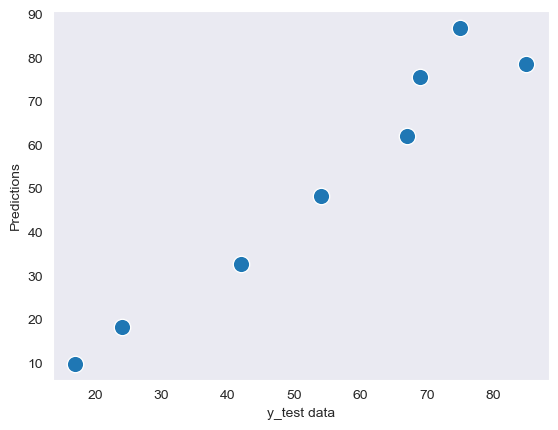

In [59]:
# checking the residuals
residuals = y_test - y_pred
# compare the data with plot
sns.scatterplot(x=y_test, y = y_pred, ci=None, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

<a id="19"></a> 
### **Evaluating linear regression models**
There are various metrics in place that we can use to evaluate linear regression models. Since models can't be 100 percent efficient, evaluating the model on different metrics can help us optimize the performance and obtain better results.

**Mean Absolute Error(MAE)**-calculates the absolute difference between the actual and predicted values.
$$MAE = \sum_{i=1}^{D}|y_i-\hat{y_i}|$$

In [62]:
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 7.169048271425507


**Mean Squared Error(MSE)**-this is the most used metric. It finds the squared difference between actual and predicted values.
$$MSE = \sum_{i=1}^{D}(y_i-\hat{y_i})^2$$

In [63]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 56.092330905646705


**Root Mean Squared Error(RMSE)** is the square root of MSE.
$$\text{RMSE} = \sqrt{\frac{\sum_{i=0}^{D - 1} (y_i - \hat{y_i})^2}{D}}$$


In [64]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 7.489481350911204


**R Squared(R2)**: R2 is also called the coefficient of determination or goodness of fit score regression function. It measures how much irregularity in the dependent variable the model can explain. The R2 value is between 0 to 1, and a bigger value shows a better fit between prediction and actual value.
$$R2 = 1-\frac{SSR}{SST} = 1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum({y_i}-\bar{y_i})^2}$$

In [65]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.8933827573294114


<a id="20"></a> 
## Generalized Linear Model
Generalized Linear Model (GLiM, or GLM) is an advanced statistical modelling technique formulated by John Nelder and Robert Wedderburn in 1972.  The models include Linear Regression, Logistic Regression, and Poisson Regression.
In a Linear Regression Model, the response (aka dependent/target) variable ‘y’ is expressed as a linear function/linear combination of all the predictors ‘X’ (aka independent/regression/explanatory/observed variables). The underlying relationship between the response and the predictors is linear (i.e. we can simply visualize the relationship in the form of a straight line). Also, the error distribution of the response variable should be normally distributed. Therefore we are building a linear model. GLM models allow us to build a linear relationship between the response and predictors, even though their underlying relationship is not linear. This is made possible by using a link function, which links the response variable to a linear model. Unlike Linear Regression models, the error distribution of the response variable need not be normally distributed. The errors in the response variable are assumed to follow an exponential family of distribution (i.e. normal, binomial, Poisson, or gamma distributions). Since we are trying to generalize a linear regression model that can also be applied in these cases, the name Generalized Linear Models.

Linear Regression model is not suitable if,

* The relationship between X and y is not linear. There exists some non-linear relationship between them. For example, y increases exponentially as X increases.
* Variance of errors in y (commonly called as Homoscedasticity in Linear Regression), is not constant, and varies with X.
* Response variable is not continuous, but discrete/categorical. Linear Regression assumes normal distribution of the response variable, which can only be applied on a continuous data. If we try to build a linear regression model on a discrete/binary y variable, then the linear regression model predicts negative values for the corresponding response variable, which is inappropriate.

Similar to Linear Regression Model, there are some basic assumptions for Generalized Linear Models as well. Most of the assumptions are similar to Linear Regression models, while some of the assumptions of Linear Regression are modified.

* Data should be independent and random (Each Random variable has the same probability distribution).
* The response variable y does not need to be normally distributed, but the distribution is from an exponential family (e.g. binomial, Poisson, multinomial, normal)
* The original response variable need not have a linear relationship with the independent variables, but the transformed response variable (through the link function) is linearly dependent on the independent variables.



<a id="21"></a> 
### Components of GLM
* Linear Predictor - just a linear combination of parameter (b) and explanatory variable (x).
* Link function - specifies the link between a random and systematic components. It indicates how the expected/predicted value of the response relates to the linear combination of predictor variables.
* The last component is the probability distribution which generates the observed variable y.

<a id="22"></a> 
### Logistic regression
If you use logit function as the link function and binomial / Bernoulli distribution as the probability distribution, the model is called logistic regression.
$$z_i = b_0 + b_1x_i$$
$$q_i=\frac{1}{1+exp(-z_i)}$$

As the logistic function returns values between 0 and 1 for arbitrary inputs, it is a proper link function for the binomial distribution.

Logistic regression is used mostly for binary classification problems. Below is an example to fit logistic regression to some data.

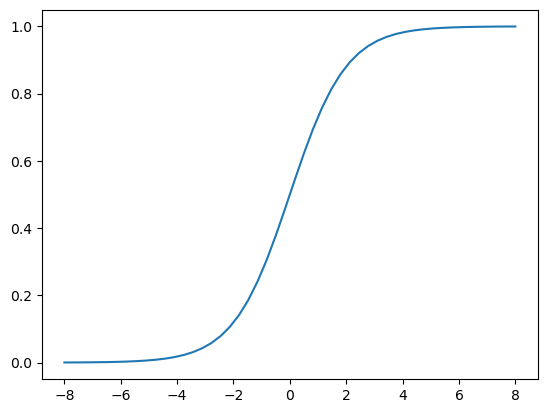

In [4]:
## logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Mon, 29 May 2023   Deviance:                       63.016
Time:                        21:04:36   Pearson chi2:                     109.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

Text(0, 0.5, 'Y')

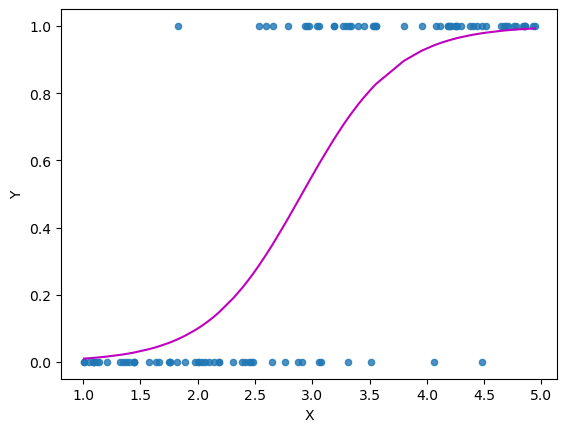

In [5]:
np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = binomial(n=1, p=q)

exog, endog = sm.add_constant(x), y

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

<a id="23"></a> 
### Poisson regression
Poisson regression is used for count based outcomes with poisson distribution. It has only one parameter which stands for both mean and standard deviation of the distribution. This means the larger the mean, the larger the standard deviation. 
$${\ln}\lambda_i = b_0 + b_1x_i$$
$$\Leftrightarrow\lambda_i = exp(b_0 + b_1x_i)$$

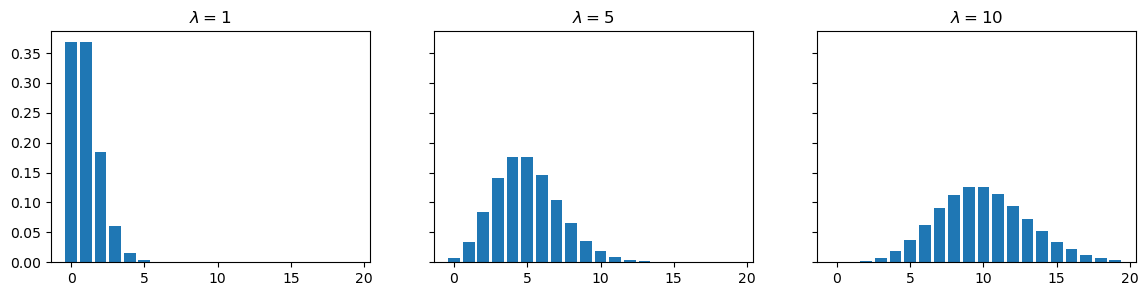

In [6]:
## Poissson distribution
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = stats.poisson.pmf(xx, lam)
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Mon, 29 May 2023   Deviance:                       120.86
Time:                        22:11:30   Pearson chi2:                     115.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8754
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

Text(0, 0.5, 'Y')

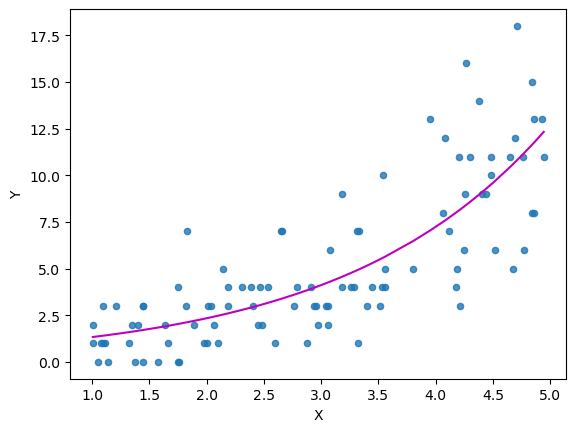

In [7]:
## Poisson regression

# generate simulation data
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")